In [1]:
%matplotlib inline

In [2]:
from numpy import genfromtxt
import numpy as np
from random import randint
import PIL.Image
from cStringIO import StringIO
import IPython.display

In [3]:
X_train = genfromtxt('notMNIST_train_data.csv', delimiter=',')
y_train = genfromtxt('notMNIST_train_labels.csv', delimiter=',')
X_test = genfromtxt('notMNIST_test_data.csv', delimiter=',')
y_test = genfromtxt('notMNIST_test_labels.csv', delimiter=',')

In [4]:
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [5]:
n = randint(1, 1000)
label = y_test[n]
im = X_test[n, :].reshape((28, 28))
print(label)
showarray(im)

1.0


In [6]:
print(type(X_train))
print(X_train.shape)
print(X_test.shape)

<type 'numpy.ndarray'>
(2622, 784)
(1124, 784)


In [7]:
from sklearn import linear_model
LogReg = linear_model.LogisticRegression()
#print('LogisticRegression score: ', logistic.fit(X_train, y_train).score(X_test, y_test))

In [8]:
LogReg.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
y_predict = LogReg.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

    
confu_matrix = confusion_matrix(y_test, y_predict)
print("Confusion_matrix: ", confu_matrix)

f1 = f1_score(y_test, y_predict)
print("F1_score: ", f1)

accuracy = accuracy_score(y_test, y_predict)
print("accuracy_score: ", accuracy)
x_values = []
y_values = []
train_scores = []
val_scores = []

('Confusion_matrix: ', array([[519,  35],
       [ 36, 534]]))
('F1_score: ', 0.93766461808604051)
('accuracy_score: ', 0.93683274021352314)


In [11]:
# Experiments
for i in range(-10,6):
    print "Value of C is: ", 10**i
    
    LogReg = linear_model.LogisticRegression(C=10**i)
    LogReg.fit(X_train, y_train) 
    yval_predict = LogReg.predict(X_val)
    ytrain_predict = LogReg.predict(X_train)

    train_score = accuracy_score(y_train, ytrain_predict)
    val_score = accuracy_score(y_val, yval_predict)
    x_values.append(10**i)
    train_scores.append(train_score)
    val_scores.append(val_score)
    
#     print "accuracy_score: train: ", train_score, "val: ",val_score
    

Value of C is:  1e-10
accuracy_score: train:  0.869277721261 val:  0.878048780488
Value of C is:  1e-09
accuracy_score: train:  0.937436419125 val:  0.92987804878
Value of C is:  1e-08
accuracy_score: train:  0.949643947101 val:  0.946646341463
Value of C is:  1e-07
accuracy_score: train:  0.962868769074 val:  0.955792682927
Value of C is:  1e-06
accuracy_score: train:  0.982197355036 val:  0.955792682927
Value of C is:  1e-05
accuracy_score: train:  0.995930824008 val:  0.948170731707
Value of C is:  0.0001
accuracy_score: train:  1.0 val:  0.939024390244
Value of C is:  0.001
accuracy_score: train:  1.0 val:  0.939024390244
Value of C is:  0.01
accuracy_score: train:  1.0 val:  0.935975609756
Value of C is:  0.1
accuracy_score: train:  1.0 val:  0.934451219512
Value of C is:  1
accuracy_score: train:  1.0 val:  0.934451219512
Value of C is:  10
accuracy_score: train:  1.0 val:  0.934451219512
Value of C is:  100
accuracy_score: train:  1.0 val:  0.934451219512
Value of C is:  1000
ac

In [12]:
print(len(val_scores))
print(val_scores)

16
[0.87804878048780488, 0.92987804878048785, 0.94664634146341464, 0.95579268292682928, 0.95579268292682928, 0.94817073170731703, 0.93902439024390238, 0.93902439024390238, 0.93597560975609762, 0.93445121951219512, 0.93445121951219512, 0.93445121951219512, 0.93445121951219512, 0.93445121951219512, 0.93597560975609762, 0.93597560975609762]


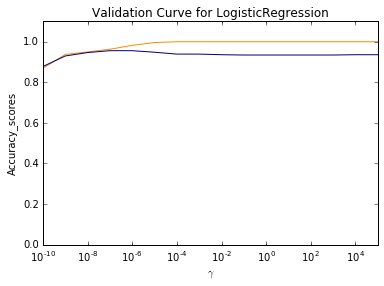

In [13]:
import matplotlib.pyplot as plt
plt.title("Validation Curve for LogisticRegression")
plt.xlabel("$\gamma$")
plt.ylabel("Accuracy_scores")
plt.ylim(0.0,1.1)

plt.semilogx(x_values, train_scores, label="Training_accuracies", color="darkorange")
plt.semilogx(x_values, val_scores, label="Validation_scores", color="navy")


Value of C is:  1e-08
Value of C is:  1e-07
Value of C is:  1e-06
Value of C is:  1e-05
Value of C is:  0.0001
Value of C is:  0.001
Value of C is:  0.01
Value of C is:  0.1
Value of C is:  1
Value of C is:  10
Value of C is:  100
Value of C is:  1000
Value of C is:  10000
Value of C is:  100000
Value of C is:  1000000
Value of C is:  10000000
Value of C is:  100000000
Value of C is:  1000000000


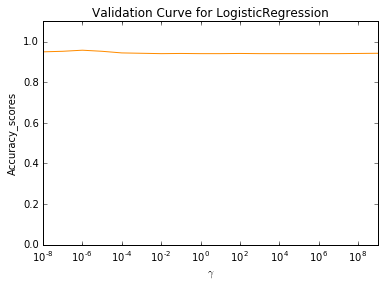

In [14]:
test_scores = []
new_x = []

for i in range(-8,10):
    print "Value of C is: ", 10**i
    
    LogReg = linear_model.LogisticRegression(C=10**i)
    LogReg.fit(X_train, y_train) 
    ytest_predict = LogReg.predict(X_test)
    
    test_score = accuracy_score(y_test, ytest_predict)
    new_x.append(10**i)
    test_scores.append(test_score)
    
plt.title("Validation Curve for LogisticRegression")
plt.xlabel("$\gamma$")
plt.ylabel("Accuracy_scores")
plt.ylim(0.0,1.1)

# plt.semilogx(new_x, test_scores, label="Testing_accuracies", color="darkorange")


In [15]:
x1_values = []
y1_values = []
train1_scores = []
val1_scores = []

# Experiments
for i in range(-10,6):
    print "Value of C is: ", 10**i
    
    LogReg = linear_model.LogisticRegression(C=10**i, penalty='l1')
    LogReg.fit(X_train, y_train) 
    yval_predict = LogReg.predict(X_val)
    ytrain_predict = LogReg.predict(X_train)

    train_score = accuracy_score(y_train, ytrain_predict)
    val_score = accuracy_score(y_val, yval_predict)
    x1_values.append(10**i)
    train1_scores.append(train_score)
    val1_scores.append(val_score)
    
    print "accuracy_score: train: ", train_score, "val: ",val_score
    

Value of C is:  1e-10
accuracy_score: train:  0.501525940997 val:  0.50762195122
Value of C is:  1e-09
accuracy_score: train:  0.501525940997 val:  0.50762195122
Value of C is:  1e-08
accuracy_score: train:  0.501525940997 val:  0.50762195122
Value of C is:  1e-07
accuracy_score: train:  0.501525940997 val:  0.50762195122
Value of C is:  1e-06
accuracy_score: train:  0.501525940997 val:  0.50762195122
Value of C is:  1e-05
accuracy_score: train:  0.501525940997 val:  0.50762195122
Value of C is:  0.0001
accuracy_score: train:  0.94506612411 val:  0.9375
Value of C is:  0.001
accuracy_score: train:  0.974567650051 val:  0.952743902439
Value of C is:  0.01
accuracy_score: train:  0.998474059003 val:  0.943597560976
Value of C is:  0.1
accuracy_score: train:  1.0 val:  0.943597560976
Value of C is:  1
accuracy_score: train:  1.0 val:  0.939024390244
Value of C is:  10
accuracy_score: train:  1.0 val:  0.935975609756
Value of C is:  100
accuracy_score: train:  1.0 val:  0.935975609756
Valu

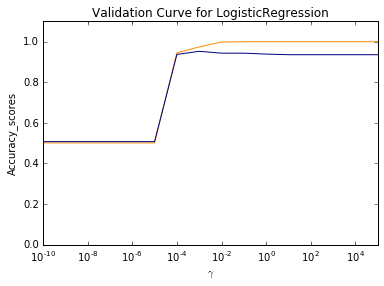

In [16]:
plt.title("Validation Curve for LogisticRegression")
plt.xlabel("$\gamma$")
plt.ylabel("Accuracy_scores")
plt.ylim(0.0,1.1)

plt.semilogx(x1_values, train1_scores, label="Training_accuracies", color="darkorange")
plt.semilogx(x1_values, val1_scores, label="Validation_scores", color="navy")


In [17]:
LogReg = linear_model.LogisticRegression(C=10**-2, penalty='l1')
LogReg.fit(X_train, y_train)
ytest_score = LogReg.predict(X_test)
score = accuracy_score(y_test, ytest_score)
print(score)

0.947508896797


[[ -2.51448960e-01   5.72721543e-01   4.58160569e-01   7.73988590e-01
    3.59572214e-01   7.54188798e-01  -5.86007654e-02  -1.29269997e+00
   -8.04793407e-01   4.21793838e-01   9.17284947e-02   2.29382431e-01
    5.19154033e-01   1.53300783e+00   1.08165952e+00   1.71060554e-01
   -3.95752848e-01  -5.77617299e-01  -1.02820174e+00  -4.28390692e-01
    2.91911687e-01   3.58223763e-02  -6.88926813e-03   0.00000000e+00
    1.62195773e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.08533205e-01   1.15442481e-01   4.62531618e-02   2.12433145e-01
   -4.50347125e-01  -4.35853056e-01   7.03709662e-01  -1.98081926e-01
   -2.89953877e-01  -1.23672792e-01  -9.36382180e-02   5.20063926e-02
    1.36687482e-01  -5.79125751e-02  -5.53036465e-02   5.35616175e-02
   -4.55046964e-01  -2.50555346e-01   1.49194680e+00   1.15969185e+00
   -3.69219314e-01  -2.40980383e-01   5.92574621e-01   9.57421176e-02
   -0.00000000e+00   2.53666029e-03   0.00000000e+00   0.00000000e+00
   -0.00000000e+00  

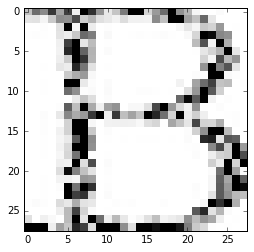

In [27]:
vis = LogReg.coef_ * X_test[0,:]
print vis.shape
coef_l1_LR = LogReg.coef_.ravel()
print coef_l1_LR.shape
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100

print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
plt.imshow(np.abs(vis.reshape(28, 28)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
# plt.show()

In [20]:
LogReg = linear_model.LogisticRegression(C=10**-3, penalty='l2')
LogReg.fit(X_train, y_train)
ytest_score = LogReg.predict(X_test)
score = accuracy_score(y_test, ytest_score)
print(score)

0.943060498221


Sparsity with L2 penalty: 37.88%


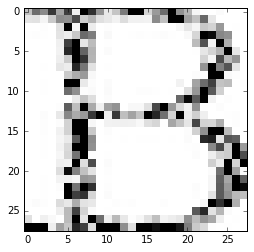

In [21]:
vis_l2 = LogReg.coef_ * X_test[0,:]
sparsity_l2_LR = np.mean(vis_l2 == 0) * 100

print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
plt.imshow(np.abs(vis_l2.reshape(28, 28)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)